In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv("Bank_Dataset/bank_marketing_updated_v1.csv")

C:\Users\manth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


#### Read the file without unnecessary headers.

In [3]:
#read the file in inp0 without first two rows as it is of no use.
inp0= pd.read_csv("Bank_Dataset/bank_marketing_updated_v1.csv",skiprows=[0,1])

In [4]:
#print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [5]:
#print the information of variables to check their data types.
inp0.dtypes

customerid      int64
age           float64
salary          int64
balance         int64
marital        object
jobedu         object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
month          object
duration       object
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
dtype: object

In [8]:
#convert the age variable data type from float to integer.
inp0['age'] = inp0['age'].astype('int64')

ValueError: Cannot convert non-finite values (NA or inf) to integer

#### Dropping customer id column. 

In [6]:
#drop the customer id as it is of no use.
inp0.drop("customerid",axis=1,inplace=True)
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [7]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']=inp0['jobedu'].apply(lambda x:x.split(',')[0])
inp0.head()


,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [8]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']= inp0['jobedu'].apply(lambda x: x.split(',')[1])

In [9]:
#drop the "jobedu" column from the dataframe.
inp0.drop('jobedu',axis=1,inplace=True)
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [11]:
round((inp0.isnull().sum()*100)/len(inp0),2)

age          0.04
salary       0.00
balance      0.00
marital      0.00
targeted     0.00
default      0.00
housing      0.00
loan         0.00
contact      0.00
day          0.00
month        0.11
duration     0.00
campaign     0.00
pdays        0.00
previous     0.00
poutcome     0.00
response     0.07
job          0.00
education    0.00
dtype: float64

### Segment- 4, Impute/Remove missing values 

#### handling missing values in age column.

In [12]:
#calculate the percentage of missing values in age column.
round((inp0.isnull().sum()*100)/len(inp0),2)

age          0.04
salary       0.00
balance      0.00
marital      0.00
targeted     0.00
default      0.00
housing      0.00
loan         0.00
contact      0.00
day          0.00
month        0.11
duration     0.00
campaign     0.00
pdays        0.00
previous     0.00
poutcome     0.00
response     0.07
job          0.00
education    0.00
dtype: float64

Drop the records with age missing. 

In [15]:
inp0.shape

(45211, 19)

In [13]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1= inp0[~inp0.age.isnull()].copy()
inp1.shape

(45191, 19)

#### handling missing values in month column

In [14]:
#count the missing values in month column in inp1.
inp1.age.isnull().sum()

0

In [15]:
#print the percentage of each month in the data frame inp1.
round((inp1.month.isnull().sum()*100)/len(inp1.month),2)

0.11

In [16]:
#find the mode of month in inp1
inp1.month.value_counts(normalize=True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [17]:
month_mode = inp1.month.mode()[0]

In [18]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(month_mode,inplace=True)

In [19]:
#let's see the null values in the month column.
inp1.month.isnull().sum()

0

#### handling missing values in response column 

In [20]:
inp0.response.dtype

dtype('O')

In [21]:
#count the missing values in response column in inp1.
round((inp0.response.isnull().sum()*100)/len(inp0.response),2)

0.07

In [47]:
#drop the records with response missings in inp1.

In [22]:
inp2 = inp1[~inp1.response.isnull()].copy()

In [20]:
#calculate the missing values in each column of data frame: inp1.

In [23]:
inp2.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

Target variable is better of not imputed.
- Drop the records with missing values.

#### handling pdays column. 

In [24]:
#describe the pdays column of inp1.
inp2['pdays'].value_counts(normalize=True)

-1      0.817409
 182    0.003698
 92     0.003233
 91     0.002790
 183    0.002768
          ...   
 526    0.000022
 749    0.000022
 717    0.000022
 589    0.000022
 32     0.000022
Name: pdays, Length: 558, dtype: float64

In [25]:
inp2['pdays'] = inp2['pdays'].replace(-1,np.nan) 

In [26]:
inp2.isnull().sum()

age              0
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays        36915
previous         0
poutcome         0
response         0
job              0
education        0
dtype: int64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [27]:
#describe the pdays column with considering the -1 values.
inp2['pdays'].describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

#### Age variable 

In [28]:
#describe the age variable in inp1.
inp2.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

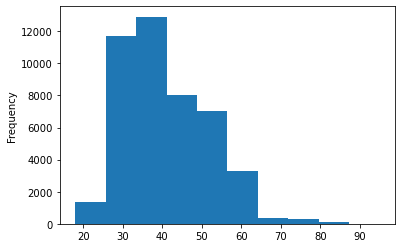

In [29]:
#plot the histogram of age variable.
inp2.age.plot.hist()

C:\Users\manth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

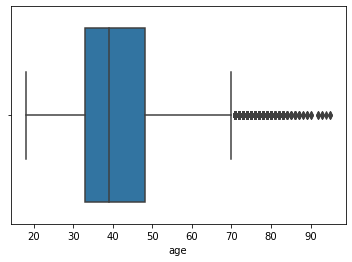

In [30]:
#plot the boxplot of age variable.
sns.boxplot(inp2.age)

In [31]:
inp2.age.quantile([0.05,0.50,0.90,0.99])

0.05    27.0
0.50    39.0
0.90    56.0
0.99    71.0
Name: age, dtype: float64

In [32]:
inp2.age.max()

95.0

#### Salary variable 

In [33]:
#describe the salary variable of inp1.
inp2.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

C:\Users\manth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary'>

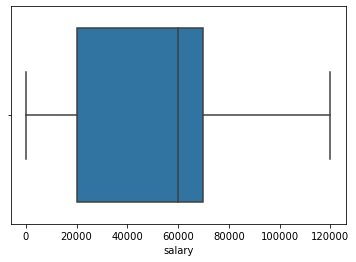

In [34]:
#plot the boxplot of salary variable.
sns.boxplot(inp2.salary)

#### Balance variable 

In [35]:
#describe the balance variable of inp1.
inp2.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

C:\Users\manth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


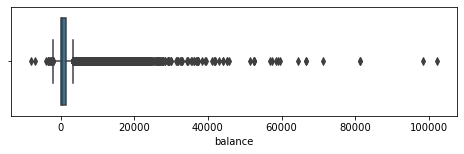

In [36]:
#plot the boxplot of balance variable.
plt.figure(figsize=[8,2])
sns.boxplot(inp2.balance)
plt.show()

In [37]:
#plot the boxplot of balance variable after scaling in 8:2.


In [38]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp2.balance.quantile([0,0.5,0.75,0.95,0.99])

0.00    -8019.0
0.50      448.0
0.75     1428.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

#### Duration variable

In [39]:
inp2.duration.head()

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
Name: duration, dtype: object

In [40]:
inp2.duration.value_counts(normalize=True)

1.5 min                 0.003056
2.06666666666667 min    0.002856
1.68333333333333 min    0.002856
1.73333333333333 min    0.002812
2.03333333333333 min    0.002812
                          ...   
1495 sec                0.000022
875 sec                 0.000022
46.1666666666667 min    0.000022
687 sec                 0.000022
2462 sec                0.000022
Name: duration, Length: 2646, dtype: float64

In [41]:
#describe the duration variable of inp1
inp2.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [42]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp2.duration = inp2.duration.apply(lambda x:float(x.split()[0])/60 if "sec" in x else float(x.split()[0]))

In [43]:
#describe the duration variable
inp2.duration.describe()

count    45161.000000
mean         4.302774
std          4.293129
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

##  Univariate Analysis 

#### Marital status 

In [44]:
inp2.dtypes

age          float64
salary         int64
balance        int64
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome      object
response      object
job           object
education     object
dtype: object

In [45]:
#calculate the percentage of each marital status category. 
inp2.marital.value_counts(normalize=True)

married     0.601957
single      0.282943
divorced    0.115099
Name: marital, dtype: float64

<AxesSubplot:>

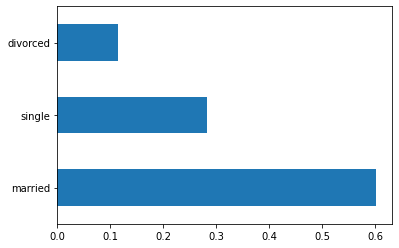

In [46]:
#plot the bar graph of percentage marital status categories
inp2.marital.value_counts(normalize=True).plot.barh()

#### Job  

In [47]:
#calculate the percentage of each job status category.
inp2.job.value_counts(normalize=True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

<AxesSubplot:>

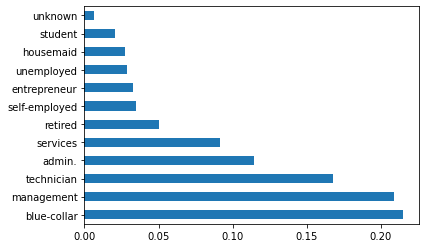

In [48]:
#plot the bar graph of percentage job categories
inp2.job.value_counts(normalize=True).plot.barh()

#### Education

In [49]:
#calculate the percentage of each education category.
inp2.education.value_counts(normalize=True)

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

<AxesSubplot:ylabel='education'>

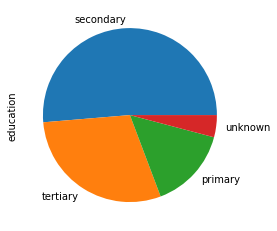

In [50]:
#plot the pie chart of education categories
inp2.education.value_counts(normalize=True).plot.pie()

#### poutcome 

<AxesSubplot:>

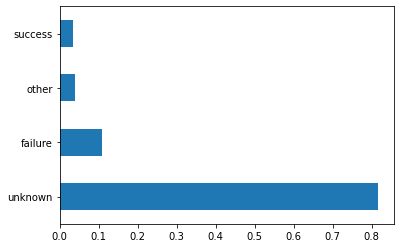

In [51]:
#calculate the percentage of each poutcome category.
inp2.poutcome.value_counts(normalize=True).plot.barh()

 Bivariate and Multivariate Analysis

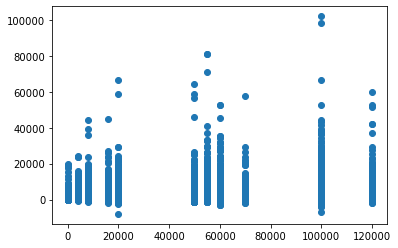

In [52]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(inp2.salary,inp2.balance)

Text(0, 0.5, 'balance')

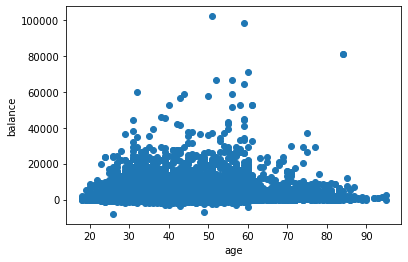

In [53]:
#plot the scatter plot of balance and age variable in inp1
plt.scatter(inp2.age,inp2.balance)
plt.xlabel('age')
plt.ylabel('balance')

#### Correlation heat map 

In [55]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
inp2[['age','balance','salary']].corr()

,age,balance,salary
age,1.000000,0.097710,0.024513
balance,0.097710,1.000000,0.055489
salary,0.024513,0.055489,1.000000


<AxesSubplot:>

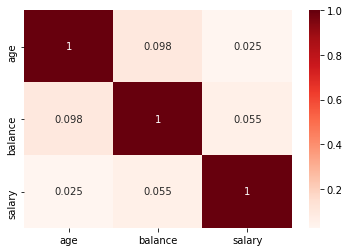

In [56]:
sns.heatmap(inp2[['age','balance','salary']].corr(),annot=True,cmap='Reds')

#### Salary vs response 

In [57]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp2.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [ ]:
#groupby the response to find the median of the salary with response no & yes seperatly.


<AxesSubplot:xlabel='response', ylabel='salary'>

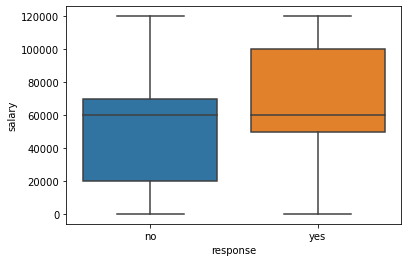

In [58]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=inp2,x='response',y='salary')

In [59]:
inp2.response

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: response, Length: 45161, dtype: object

In [60]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp2['response_flag'] = np.where(inp2.response=='no',0,1)

In [62]:
inp2.response_flag.value_counts()

0    39876
1     5285
Name: response_flag, dtype: int64

In [64]:
inp2.response.value_counts()

no     39876
yes     5285
Name: response, dtype: int64

#### Education vs response rate

In [65]:
pd.cut?

In [66]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp2['age_bucket'] = pd.cut(inp2.age,[0,30,40,50,60,9999],labels=["<30","30-40","40-50","50-60","60+"])

In [68]:
inp2.age_bucket.head(5)

0    50-60
1    40-50
2    30-40
3    40-50
4    30-40
Name: age_bucket, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [69]:
inp2.age.head()

0    58.0
1    44.0
2    33.0
3    47.0
4    33.0
Name: age, dtype: float64

Text(0, 0.5, 'response_flag')

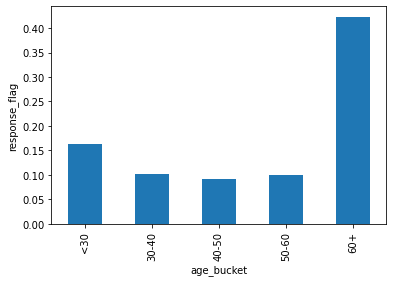

In [73]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
inp2.groupby(['age_bucket'])['response_flag'].mean().plot.bar()
plt.ylabel("response_flag")